# NumPy Basics

Adapted from work of J.R. Johansson

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provides high-performance vector, matrix and higher-dimensional data structures for Python. 

To use `numpy` you need to import the module, using for example:

In [1]:
import numpy as np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

We will cover the first method here and the latter two in the *Numpy Intermediate* notebook.

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [2]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [3]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [4]:
print(type(v))
print(type(M))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

So far the `numpy.ndarray` looks awfully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [7]:
M.dtype

dtype('int32')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [8]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

**Exercise**: Create numpy arrays to represent:
$$(2.5,4.1,6,8.2)$$
and 
$$\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}$$
Check their shape and dtype.

In [9]:
v1 = np.array([2.5,4.1,6,8.2])
print("v1 = ", v1, "\n")

M1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
print("M1 = \n", M1)

v1 =  [2.5 4.1 6.  8.2] 

M1 = 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Manipulating arrays

### Indexing

In [10]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [11]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

4

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [12]:
M

array([[1, 2],
       [3, 4]])

In [13]:
M[1]

array([3, 4])

The same thing can be achieved with using `:` instead of an index: 

In [14]:
M[1,:] # row 1

array([3, 4])

In [15]:
M[:,1] # column 1

array([2, 4])

We can assign new values to elements in an array using indexing:

In [16]:
M[0,0] = 0

In [17]:
M

array([[0, 2],
       [3, 4]])

**Exercise**: Create a numpy array to represent 
$$\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}$$.
1. Print the entry $5$.
2. Print the row $(7,8,9)$.
3. Print the column $(1,4,7)$.
4. Replace the value $7$ with the value $17$.


In [18]:
M1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("M1 = \n", M1, "\n")

#1
print("1.", M1[1,1])

#2
print("2.", M1[2,:])

#3
print("3.", M1[:,2])

#4
M1[2,0] = 17
print("4.\n", M1)

M1 = 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

1. 5
2. [7 8 9]
3. [3 6 9]
4.
 [[ 1  2  3]
 [ 4  5  6]
 [17  8  9]]


## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [19]:
v1 = np.array([0,1,2,3,4])

In [20]:
v1 + 2

array([2, 3, 4, 5, 6])

In [21]:
v1 * 2

array([0, 2, 4, 6, 8])

Compare with the same operation applied to a list:

In [22]:
[0, 1, 2, 3, 4] * 2

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

We can also do this on higher dimension arrays.

In [23]:
M * 2

array([[0, 4],
       [6, 8]])

In [24]:
M - 2

array([[-2,  0],
       [ 1,  2]])

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [25]:
M * M # element-wise multiplication

array([[ 0,  4],
       [ 9, 16]])

In [26]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [27]:
A = np.array([[1,1,1,1,1],[2,2,2,2,2],[3,3,3,3,3],[4,4,4,4,4],[5,5,5,5,5]])

In [28]:
A.shape, v1.shape

((5, 5), (5,))

In [29]:
A * v1

array([[ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16],
       [ 0,  5, 10, 15, 20]])

**Exercise**: Find the angle between two vectors $(1,2,3)$ and $(4,-5,6)$.

In [30]:
vec1 = np.array([1,2,3])
vec2 = np.array([4,-5,6])
vec1_len = np.sqrt(vec1.T @ vec1)
vec2_len = np.sqrt(vec2.T @ vec2)
cos_angle = (vec1.T @ vec2) / (vec1_len * vec2_len)
angle = np.arccos(cos_angle)
print(angle)
pi_mul = angle/np.pi
print("or \n", pi_mul, "\u03C0", sep='')

1.1966404427876283
or 
0.3809024831466508π


### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [31]:
np.dot(A,A)

array([[15, 15, 15, 15, 15],
       [30, 30, 30, 30, 30],
       [45, 45, 45, 45, 45],
       [60, 60, 60, 60, 60],
       [75, 75, 75, 75, 75]])

In [32]:
np.dot(A, v1)

array([10, 20, 30, 40, 50])

In [33]:
np.dot(v1, v1)

30

The `@` operator can be used as a shorthand:



In [34]:
A @ A

array([[15, 15, 15, 15, 15],
       [30, 30, 30, 30, 30],
       [45, 45, 45, 45, 45],
       [60, 60, 60, 60, 60],
       [75, 75, 75, 75, 75]])

In [35]:
A @ v1

array([10, 20, 30, 40, 50])

In [36]:
v1 @ v1

30

If we try to add, subtract or multiply objects with incompatible shapes we get 
an error:

In [37]:
v = np.matrix([1,2,3,4,5,6]).T

In [38]:
np.shape(A), np.shape(v)

((5, 5), (6, 1))

In [39]:
A * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

**Exercise**: Write a matrix which rotates vectors in $\mathbb{R}^2$ counterclockwise by $60^\circ$. Apply it to the vectors $(1,0)$ and $(0,1)$. Check your results.

In [40]:
c = np.cos(np.pi/3)
s = np.sin(np.pi/3)
rot_mat = ([[c,-s],[s,c]])

vec1 = np.array([1,0])
vec2 = np.array([0,1])

print(rot_mat @ vec1)
print(rot_mat @ vec2)

[0.5       0.8660254]
[-0.8660254  0.5      ]


### Matrix computations

#### Inverse

In [41]:
np.linalg.inv(M) 

array([[-0.66666667,  0.33333333],
       [ 0.5       ,  0.        ]])

**Exercise**: Verify that this is the inverse of $M$.

In [42]:
M @ np.linalg.inv(M) 

array([[1., 0.],
       [0., 1.]])

#### Determinant

In [43]:
np.linalg.det(M)

-6.0

In [44]:
np.linalg.det(np.linalg.inv(M))

-0.16666666666666669

# Mini-projects

## Linear Regression

In this section you will perform linear regression using matrix algebra. Let us first generate the data for the regression

In [2]:
# 1. Generate x and y values for linear regression.
np.random.seed(0)  # Seed for reproducibility
x = 2 * np.random.rand(100, 1)
y = 3 * x + np.random.randn(100, 1)  # y = 3x + gaussian noise

Write a function to perform linear regression for y ~ x. [This](https://www.sydney.edu.au/content/dam/students/documents/mathematics-learning-centre/using-matrix-algebra-in-linear-regression.pdf) link might be helpful if you've forgoten how to do this using matrix algebra.

In [3]:
# 2. Compute the linear regression.
beta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

Run the following code to plot the resulting regression line

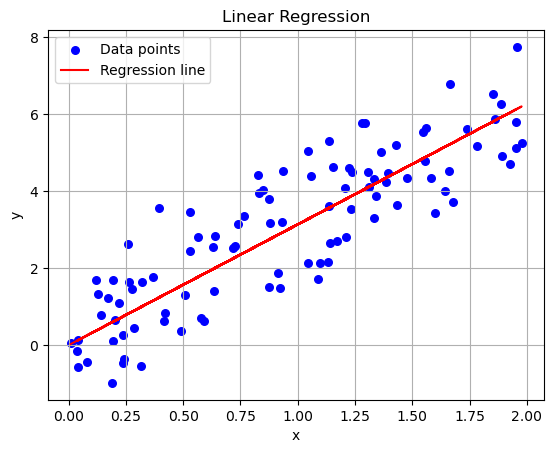

In [4]:
# 3. Plot the data points and the regression line.
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', s=30, label='Data points')
plt.plot(x, beta * x, color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.grid(True)
plt.show()

## Adjacency Matrix

The adjacency matrix $A$ of a graph with $n$ nodes is an $n\times n$ matrix where the entry $a_{i,j}=1$ if there is an edge between vertices $i$ and $j$ and $a_{i,j}=0$ otherwise. 
1. Write the adjacency matrix for the graph pictured below. You'll need to choose an ordering on the vertices.
2. What does $A^2$ represent?
3. Use the adjacency matrix to calculate the diameter of the graph. (Hint: use #2.)

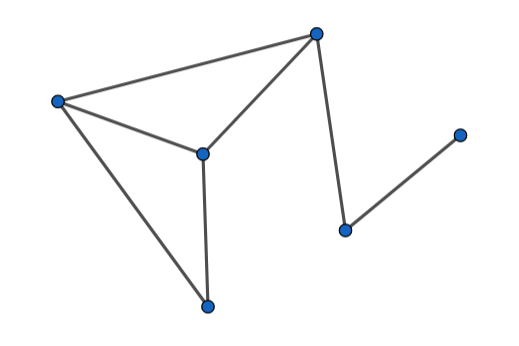

**Solution**: I used the following labeling:

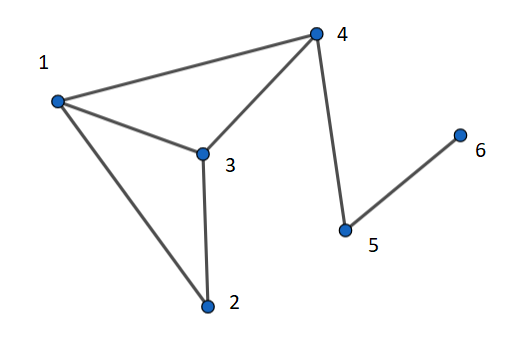

In [53]:
#1
A = np.array([[0,1,1,1,0,0],[1,0,1,0,0,0],[1,1,0,1,0,0],[1,0,1,0,1,0],[0,0,0,1,0,1],[0,0,0,0,1,0]])
print(A)

[[0 1 1 1 0 0]
 [1 0 1 0 0 0]
 [1 1 0 1 0 0]
 [1 0 1 0 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 0]]


2. The value of $a_{i,j}$ in the matrix $A^2$ gives the number of paths of length 2 from node $i$ to node $j$.

3. Similarly, the value of $a_{i,j}$ in $A^n$ gives the number of paths of length $n$ from node $i$ to $j$. Thus, in $A + A^2 + A^3 + \cdots + A^n$, the entry $a_{i,j}$ represents the number of paths from $i$ to $j$ of length at most $n$. So the diameter of the graph is the least $n$ such that every entry in $A + A^2 + A^3 + \cdots + A^n$ is nonzero:

In [54]:
diam = 1
sum = np.copy(A)
while True:
  if not np.any(sum == 0):
    print("The diameter of the graph is ", diam, ".", sep='')
    break
  
  diam += 1
  sum  = sum @ A + A

The diameter of the graph is 4.
